In [17]:
#!pip install livelossplot

In [18]:
import pandas as pd
import numpy as np
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()
from keras import models

In [19]:
data = pd.read_csv("/content/diabetes.csv", names = ["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"])
data.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [20]:
data.shape

(768, 9)

In [21]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
dataX = data[["Pregnancies","Glucose","BloodPressure"]]
dataX

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
...,...,...,...
763,10,101,76
764,2,122,70
765,5,121,72
766,1,126,60


In [24]:
dataY = data[["Outcome"]]
dataY

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [25]:
from sklearn.model_selection import train_test_split
X_train1, X_cv1, y_train1, y_cv1 = train_test_split(dataX, dataY, 
                                                test_size = 0.3,
                                                random_state = 1212)

In [26]:
model = models.Sequential()
model.add(Dense(8, activation='relu',))
model.add(Dense(2, activation='softmax')) # Change Softmax to Sigmoid since Sigmoid is the proper activation function for binary data

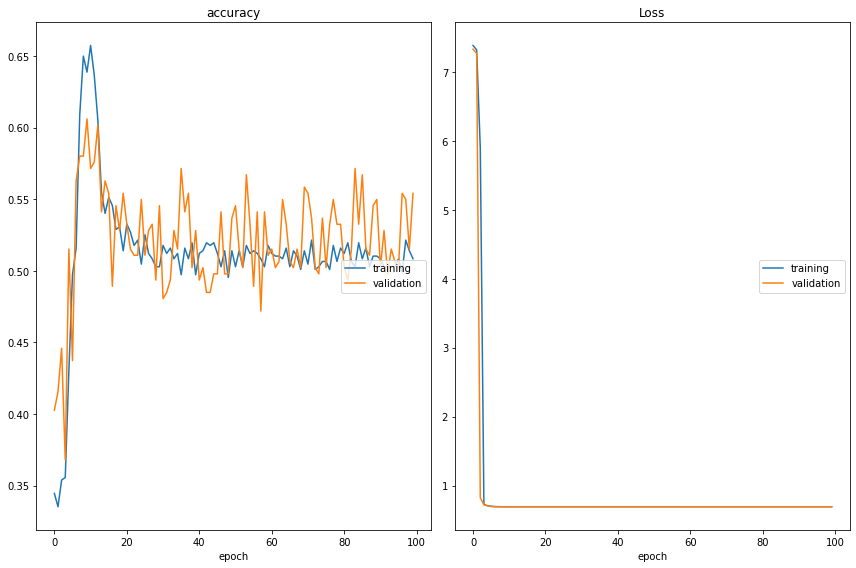

accuracy
	training         	 (min:    0.335, max:    0.657, cur:    0.508)
	validation       	 (min:    0.368, max:    0.606, cur:    0.554)
Loss
	training         	 (min:    0.693, max:    7.383, cur:    0.693)
	validation       	 (min:    0.693, max:    7.330, cur:    0.693)
54/54 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.4926 - val_loss: 0.6931 - val_accuracy: 0.5541
Test loss: 0.6931470036506653
Test accuracy: 0.5541125535964966


In [27]:
model.compile(optimizer='SGD', 
              loss='binary_crossentropy', #Change Categorical Cross Entropy to Binary Cross Entropy since your output label is binary. 
              metrics=['accuracy'])

# Train model
model.fit(X_train1, y_train1,
          batch_size=10,
          epochs=100,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_cv1, y_cv1))

score = model.evaluate(X_cv1, y_cv1, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [28]:
X = data.drop(["Outcome"],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [29]:
Y = data[["Outcome"]]
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, Y, 
                                                test_size = 0.3,
                                                random_state = 1212)

In [31]:
model2 = models.Sequential()
model2.add(Dense(16, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(2, activation='softmax'))

In [32]:
#!pip install tf-nightly

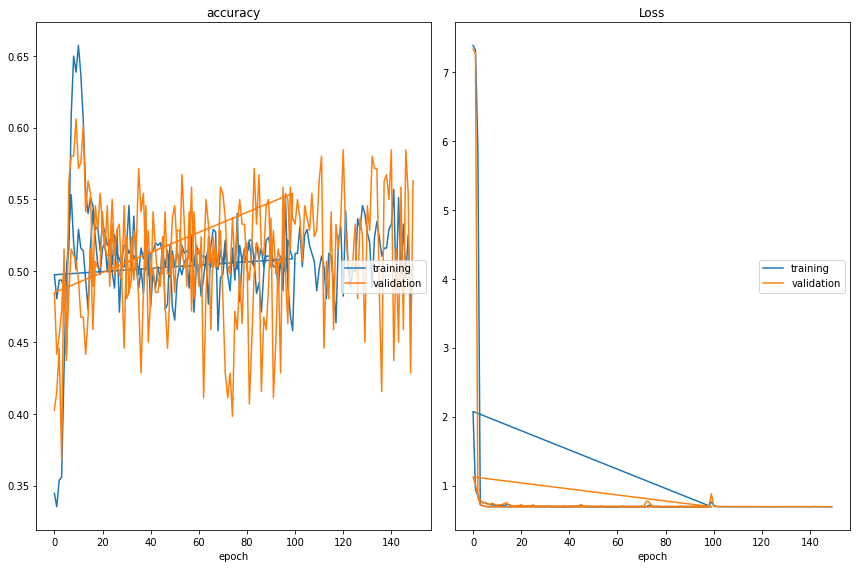

accuracy
	training         	 (min:    0.335, max:    0.657, cur:    0.505)
	validation       	 (min:    0.368, max:    0.606, cur:    0.563)
Loss
	training         	 (min:    0.693, max:    7.383, cur:    0.693)
	validation       	 (min:    0.693, max:    7.330, cur:    0.694)
54/54 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.4900 - val_loss: 0.6935 - val_accuracy: 0.5628
Test loss: 0.693544864654541
Test accuracy: 0.5627705454826355


In [33]:
model2.compile(optimizer='adam', 
              loss='binary_crossentropy', #Change Categorical Cross Entropy to Binary Cross Entropy since your output label is binary. 
              metrics=['accuracy'])

# Train model
model2.fit(X_train, y_train,
          batch_size=10,
          epochs=150,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_cv, y_cv))

score = model2.evaluate(X_cv, y_cv , verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])